<a href="https://colab.research.google.com/github/entmike/disco-diffusion-1/blob/main/Simplified_Disco_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simplified Disco Diffusion

[![Discord](https://badgen.net/badge/icon/discord?icon=discord&label)](https://discord.gg/Pmy3wFKbna)
[![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://github.com/entmike/disco-diffusion-1)
![Terminal](https://badgen.net/badge/icon/terminal?icon=terminal&label)
[![Issues](https://img.shields.io/github/issues/entmike/disco-diffusion-1)](https://github.com/entmike/disco-diffusion-1/issues)
![Stars](https://img.shields.io/github/stars/entmike/disco-diffusion-1)
![Commits](https://img.shields.io/github/commit-activity/w/entmike/disco-diffusion-1)

**Expand this section for details.**

🙏 Inspired from [alembics Notebook](https://colab.research.google.com/github/alembics/disco-diffusion/blob/main/Disco_Diffusion.ipynb) and others.

🙋‍♂️ Contributions welcomed at [https://github.com/entmike/disco-diffusion-1](https://github.com/entmike/disco-diffusion-1)

## Help
- [Zippy's DD Cheatsheet](https://docs.google.com/document/d/1l8s7uS2dGqjztYSjPpzlmXLjl5PM3IGkRWI3IiCuK7g)

- [EZ Charts](https://docs.google.com/document/d/1ORymHm0Te18qKiHnhcdgGp-WSt8ZkLZvow3raiu2DVU)


## Changes/Enhancements
- **May 11, 2022**
  - Discord link fixed
- **May 10, 2022**
  - Fix, then break, then fix again, pytorch3d and 3d animations
- **May 6, 2022**
  - Twilio SMS alerts (optional, disabled by default)
- **May 5, 2022**
  - sqlite3 DB support to store your params and images for future query/display/searching.
- **May 4, 2022**
  - Add fallback URLs to model downloads
  - Add `init_images` and `images_out` parameters to control directory locations
  - Add `save_metadata` (Default = `False`) parameter to optionally embed DD params into your .PNGs
  - Add `multiplier` support.
- **May 3, 2022**
  - Add Symmetry Parameters
  - Modifier Support for Art Studies!  (Consider the [YAML Notebook](https://colab.research.google.com/github/entmike/disco-diffusion-1/blob/main/Simplified_Disco_Diffusion_YAML.ipynb) though for your own sanity...)
- **May 2, 2022**
  - Add initial support for YAML load/export
  - Add initial logging support

- **April 2022**
  - All functions moved to `dd.py` that are not needed in the Notebook to reduce clutter and hopefully improve readibility.

  - All other Git repos that used to get cloned and dumped in your Google Drive are now referenced as pip packages.

### Command-Line Support

  After running the **Set Up Environment** cell, from your Google Colab Terminal you can run your Disco Diffusion workload from a terminal or make a `bash` script to do multiple different batches.  Example:

  ```bash
  cd /content/gdrive/MyDrive/disco-diffusion-1
  python disco.py --steps=50 --batch_name="CommandLineBatch" --RN50=False \
  --text_prompts='{"0":["A beautiful painting of a dolphin","ocean theme"]}'
  ```
### YAML Support from Terminal

  Use a YAML file to save/change your settings.  (See `examples/configs/lighthouse.yml` for an example structure.)
   ```bash
   cd /content/gdrive/MyDrive/disco-diffusion-1
   python disco.py --config_file=examples/configs/lighthouse.yml
   ```


# Set Up Environment

**Run is Required.**

Expand to set parameters related to location, Git Repo, and Branch to pull Discord Diffusion from.

In [2]:
#@title Set Up Environment
import os, sys
import subprocess, torch

#@markdown Leave these as defaults unless you know what you are doing.

use_google_drive = True #@param {type:"boolean"}
save_models = True #@param {type:"boolean"}
check_for_updates = True #@param {type:"boolean"}
content_root = '/content'
repo = "https://github.com/entmike/disco-diffusion-1" #@param {type:"string"}
branch = "main" #@param {type:"string"}
cwd = os.path.abspath('.')
is_local=True

if is_local: content_root=cwd
print (f'Current directory: {cwd}')

if use_google_drive == True:
  import os
  from google.colab import drive
  if os.path.isdir('/content/gdrive') == False:
    print(f'📁 Mounting Google Drive.  Please accept any confirmation screens.')
    drive.mount('/content/gdrive/')
  else:
    print(f'📁 Google Drive already mounted.')
  content_root = '/content/gdrive/MyDrive'

dd_root = f'{content_root}/disco-diffusion-1'

print(f'✅ Disco Diffusion root path will be "{dd_root}"')

is_colab = False
try:
    from google.colab import drive
    print("Google Colab detected.")
    is_colab=True
except:
    print("Google Colab not detected.")
    is_colab=False

root_path = dd_root

# Clone Repo
if os.path.isdir(f'{dd_root}') == False:
  print(f"Cloning repo '{repo}' into '{dd_root}'...")
  os.chdir(f'{content_root}')
  subprocess.run(f'git clone {repo}'.split(' '), stdout=subprocess.PIPE).stdout.decode("utf-8")

os.chdir(f'{dd_root}')
if check_for_updates == True:
  # Pull any updates
  print(f'📄 Pulling updates from GitHub...')
  for cmd in ['git clean -df', f'git checkout {branch}', f'git pull origin {branch}']:
    gitresults = subprocess.run(f'{cmd}'.split(' '), stdout=subprocess.PIPE).stdout.decode("utf-8")
    print(f'{gitresults}')
else:
  print("⚠️ Skipping checking for Git updates")
#Upgrade pyyaml if in Colab
if is_colab:
    print(f'📦 Upgrading pyyaml...')
    subprocess.run(f'pip install --upgrade pyyaml --quiet'.split(' '), stdout=subprocess.PIPE).stdout.decode("utf-8")
    print(f'📦 Installing pip requirements...')
    subprocess.run(f'pip install -r colab-requirements.txt --quiet'.split(' '), stdout=subprocess.PIPE).stdout.decode("utf-8")
    need_pytorch3d=False
    try:
      import pytorch3d
    except ModuleNotFoundError:
        need_pytorch3d=True
    
    if need_pytorch3d:
        print(f'📦 Installing pytorch3d requirements...')
        if torch.__version__.startswith("1.11.") and sys.platform.startswith("linux"):
            # We try to install PyTorch3D via a released wheel.
            pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
            version_str="".join([
                f"py3{sys.version_info.minor}_cu",
                torch.version.cuda.replace(".",""),
                f"_pyt{pyt_version_str}"
            ])
            subprocess.run(f'pip install fvcore iopath'.split(' '), stdout=subprocess.PIPE).stdout.decode("utf-8")
            subprocess.run(f'pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html'.split(' '), stdout=subprocess.PIPE).stdout.decode("utf-8")
        # else:
        #     # We try to install PyTorch3D from source.
        #     !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        #     !tar xzf 1.10.0.tar.gz
        #     os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        #     !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

# Set base project directory to current working directory
PROJECT_DIR = dd_root

# Import DD helper modules
sys.path.append(PROJECT_DIR)
import dd, dd_args

# Unsure about these:
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

# print(dd.is_in_notebook())

Current directory: /content/gdrive/MyDrive/disco-diffusion-1
📁 Google Drive already mounted.
✅ Disco Diffusion root path will be "/content/gdrive/MyDrive/disco-diffusion-1"
Google Colab detected.
📄 Pulling updates from GitHub...

M	configs/TimeToDisco.yaml
M	download_models.sh
M	examples/docker/disco-file.sh
M	examples/docker/disco.sh
M	examples/docker/interactive.sh
M	examples/docker/unittest.sh
M	examples/linux/configfile.sh
M	examples/linux/simple.sh
Your branch is up to date with 'origin/main'.

Already up to date.

📦 Upgrading pyyaml...
📦 Installing pip requirements...


# Parameters

**Press Run to Apply Parameter changes.**

Expand to see parameters.

In [3]:
#@title ## Main Parameters
from pydotted import pydot
args = pydot({})
#@markdown `batch_name` specifies the folder name created in `images_out` to store your images.
args.batch_name = "TimeToDisco" #@param {type:"string"}
args.cuda_device = "cuda:0"
args.init_images = "init_images" #@param {type:"string"}
args.images_out = "images_out" #@param {type:"string"}
args.gen_config = "AUTO" #@param {type:"string"}
args.gen_config_only = False #@param {type:"boolean"}
args.config_file = None #@param {type: "raw"}
#@markdown `set_seed` Default: 'random_seed' Accepts any integer
args.set_seed = 'random_seed' #@param type="raw"
args.n_batches = 150 #@param {type:"number"}
args.width_height = [1280,768] #@param {type:"raw"}
args.steps = 170 #@param {type:"slider", min:0, max:1000, step:10}
args.text_prompts = {"0": ["A beautiful painting of a singular lighthouse, shining its light across a tumultuous sea of blood by greg rutkowski and thomas kinkade, Trending on artstation.","yellow color scheme"],"100": ["This set of prompts start at frame 100","This prompt has weight five:5"]} #@param type="raw"
args.image_prompts = { } #@param type="raw"
args.google_drive = False
#@markdown ## Models
args.RN50 = True #@param {type:"boolean"}
args.RN101 = False #@param {type:"boolean"}
args.RN50x64 = False #@param {type:"boolean"}
args.RN50x16 = False #@param {type:"boolean"}
args.RN50x4 = False #@param {type:"boolean"}
args.ViTB16 = True #@param {type:"boolean"}
args.ViTB32 = True #@param {type:"boolean"}
args.ViTL14 = False #@param {type:"boolean"}
args.ViTL14_336 = False #@param {type:"boolean"}
args.use_secondary_model = True #@param {type:"boolean"}
args.diffusion_model = "512x512_diffusion_uncond_finetune_008100" #@param ["512x512_diffusion_uncond_finetune_008100", "256x256_diffusion_uncond"]
args.use_checkpoint = True #@param {type:"boolean"}
args.cutout_debug = False #@param {type:"boolean"}
args.diffusion_sampling_mode = "ddim" #@param ["ddim", "plms"]
args.clip_guidance_scale = 5000 #@param {type:"number"}
args.tv_scale = 0 #@param {type:"number"}
args.range_scale = 150 #@param {type:"number"}
args.sat_scale = 0 #@param {type:"number"}
args.cutn_batches = 4 #@param {type:"number"}
args.skip_augs = False #@param {type:"boolean"}
args.init_image = None #@param {type:"raw"}
args.init_scale = 1000 #@param {type:"number"}
args.skip_steps = 10 #@param {type:"number"}
args.animation_mode = "None" #@param ["None", "2D", "3D", "Video Input"]
args.video_init_path = "training.mp4" #@param {type:"string"}
args.extract_nth_frame = 10 #@param {type:"number"}
args.video_init_seed_continuity = True #@param {type:"boolean"}
args.key_frames = True #@param {type:"boolean"}
args.max_frames = 10000 #@param {type:"number"}
args.interp_spline = "Linear" #@param ["Linear", "Quadratic", "Cubic"]
args.resume_run = False #@param {type:"boolean"}
args.run_to_resume = "latest" #@param {type:"string"}
args.frames_skip_steps = "60%" #@param {type:"string"}
args.intermediate_saves = 0 #@param {type:"number"}
args.intermediates_in_subfolder = True #@param {type:"boolean"}
args.console_preview = False #@param {type:"boolean"}
args.console_preview_width = 80 #@param {type:"number"}
args.display_rate = 50 #@param {type:"number"}
args.retain_overwritten_frames = False #@param {type:"boolean"}
args.vr_mode = False #@param {type:"boolean"}
args.angle = '0:(0)' #@param {type:"string"}
args.zoom = '0:(1),10:(1.05)' #@param {type:"string"}
args.translation_x = "0: (0)" #@param {type:"string"}
args.translation_y = "0: (0)" #@param {type:"string"}
args.translation_z = "0: (10.0)" #@param {type:"string"}
args.rotation_3d_x = "0: (0)" #@param {type:"string"}
args.rotation_3d_y = "0: (0)" #@param {type:"string"}
args.rotation_3d_z = "0: (0)" #@param {type:"string"} 
args.midas_depth_model = "dpt_large" #@param {type:"string"}
args.midas_weight = 0.3 #@param {type:"number"}
args.near_plane = 0 #@param {type:"number"}
args.far_plane = 0 #@param {type:"number"}
args.fov = 0 #@param {type:"number"}
args.padding_mode = "border" #@param {type:"string"}
args.sampling_mode = "bicubic" #@param {type:"string"}
args.turbo_mode = False #@param {type:"boolean"}
args.turbo_steps = 3 #@param {type:"number"}
args.turbo_preroll = 10#@param {type:"number"}
args.frames_scale = 1500 #@param {type:"number"}
args.frames_skip_steps = "60%" #@param {type:"string"}
args.cut_overview = "[12]*400+[4]*600" #@param 
args.cut_innercut = "[4]*400+[12]*600" #@param 
args.cut_icgray_p = "[0.2]*400+[0]*600" #@param 
args.cut_ic_pow = 1 #@param {type:"number"}
args.perlin_init = False #@param {type:"boolean"}
args.perlin_mode = "mixed" #@param ["mixed", "color", "gray"]
args.eta = 0.8 #@param {type:"number"}
args.clamp_grad = True #@param {type:"boolean"}
args.clamp_max = 0.05 #@param {type:"number"}
args.randomize_class = True #@param {type:"boolean"}
args.clip_denoised = False #@param {type:"boolean"}
args.fuzzy_prompt = False #@param {type:"boolean"}
args.rand_mag = 0.05 #@param {type:"number"}
#@markdown 🔽 Symmetry Settings
args.symmetry_loss = False #@param {type:"boolean"}
args.symmetry_loss_scale = 1500 #@param {type:"number"}
args.symmetry_switch = 80 #@param {type:"number"}
#@markdown 📱 Twilio SMS Settings (Optional)
args.twilio_account_sid = "" #@param {"type":"string"}
args.twilio_auth_token = "" #@param {"type":"string"}
args.twilio_from = "" #@param {"type":"string"}
args.twilio_to = "" #@param {"type":"string"}
#@markdown ⚙️ Batching and DB Settings
args.modifiers = { } #@param type="raw"
args.multipliers = { } #@param type="raw"
args.save_metadata = False #@param {type:"boolean"}
args.db = "/content/gdrive/MyDrive/disco-diffusion-1/disco.db" #@param {"type":"string"}


# Start Job

**Press Run to Start Job!**

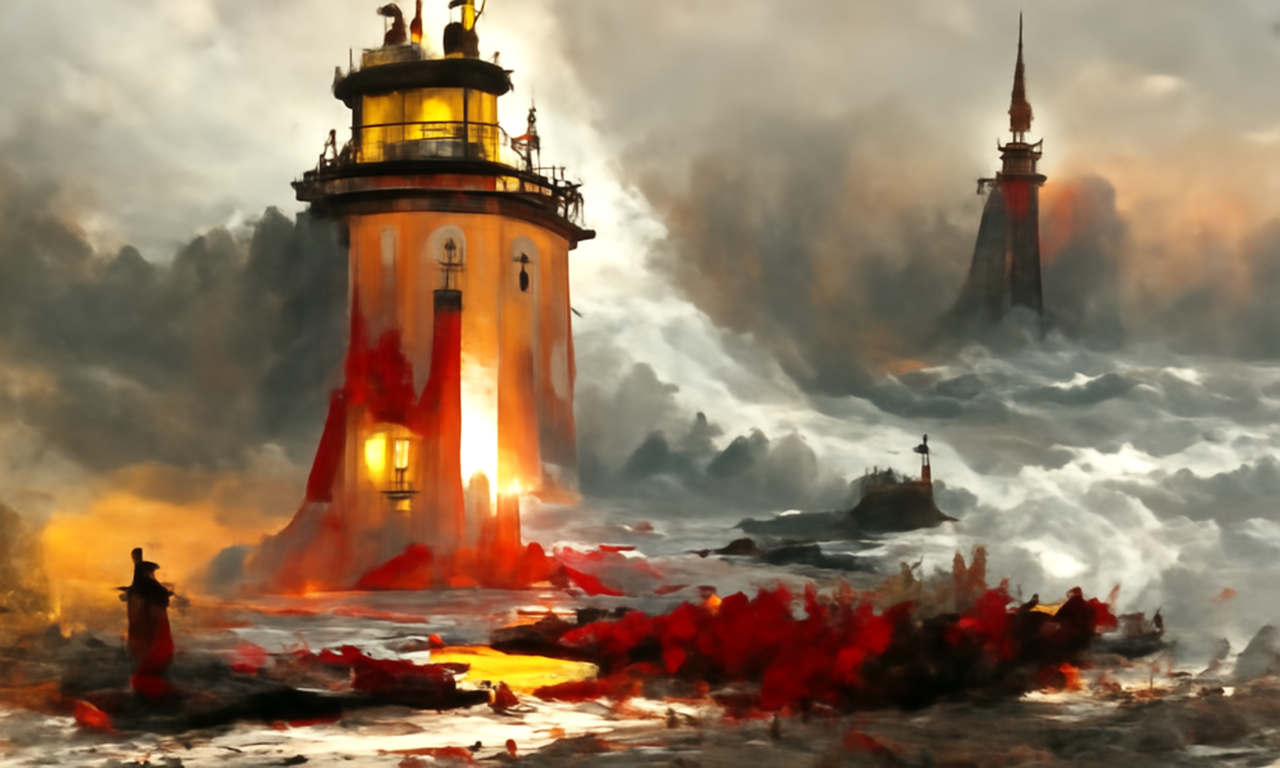

In [ ]:
# Load defaults
dd_args.arg_configuration_loader()  # Workaround to do param saving to yaml for now.
pargs = args  # Dont run through arg_configuration_loader as it expects CLI.

# Setup folders
folders = dd.setupFolders(is_colab=dd.detectColab(), PROJECT_DIR=PROJECT_DIR, pargs=pargs)

# Load Models
dd.loadModels(folders)

# Report System Details
dd.systemDetails(pargs)

# Get CUDA Device
device = dd.getDevice(pargs)

dd.start_run(pargs=pargs, folders=folders, device=device, is_colab=dd.detectColab())